# Jose Mtanous A00169781
## MNA Ciencia de Datos
### Actividad Semanal -- 7 Regresiones y K means

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']
y = pd.DataFrame(y)

In [4]:
len(X)

1000

In [5]:
y.describe

<bound method NDFrame.describe of      Manufacturing Cost
0             95.066056
1             96.531750
2             73.661311
3             95.566843
4             98.777013
..                  ...
995           23.855067
996           27.536542
997           25.973787
998           25.138311
999           21.547777

[1000 rows x 1 columns]>

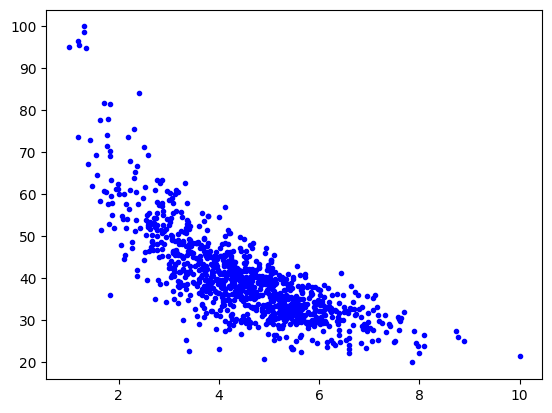

In [6]:
from matplotlib.pyplot import scatter
plt.plot(X,y,'b.')

#### Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [7]:
# Vamos a empezar dividiendo los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)


#### Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline

pipeLinear = Pipeline([('regresor',LinearRegression(fit_intercept=True))])
pipeLinear.fit(X_train,y_train)
pipeLinear['regresor'].coef_, pipeLinear['regresor'].intercept_


(array([[-6.14066196]]), array([67.51071464]))

Con los componentes calculados, la ecuación lineal sería:
$\hat{y} =  -6.14x + 67.51$

/home/jmtanous/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


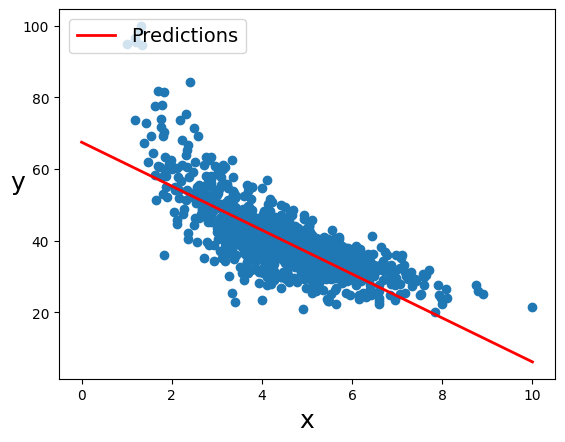

In [9]:
# Graficamos la linea y sobre los datos

# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = pipeLinear.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [10]:
#errores:
from sklearn.metrics import mean_absolute_error, r2_score
# MAE
yhat = pipeLinear.predict(X_test)
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))


-----------------MAE--------------
4.476124068321028
-----------------R_Square--------------
0.6171546016469538


#### Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# Como no indican el grado del polinomio voy a usar un de grado 2 ya que los dátos parecen que sigeun una curva cuadrática
pipePoly = Pipeline([('poly',PolynomialFeatures(degree=4, include_bias=False)),('regresor',LinearRegression(fit_intercept=True))])
pipePoly.fit(X_train, y_train)
pipePoly['regresor'].coef_, pipePoly['regresor'].intercept_



(array([[-5.67857127e+01,  1.28533740e+01, -1.35980216e+00,
          5.33375344e-02]]),
 array([135.04703065]))

La ecuación de segundo orden quedaría:
$\hat{y} =  0.05x^4 - 1.3x^3 + 12.9x^2 - 56.7x + 135.35$

/home/jmtanous/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


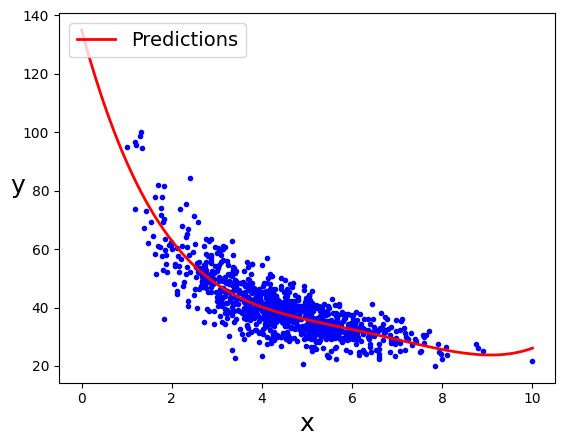

In [12]:
X_fit=np.linspace(0, 10, 100).reshape(100, 1)
y_fit = pipePoly.predict(X_fit)
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)



In [13]:
#errores:
yhat = pipePoly.predict(X_test)
# MAE
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
# Rsquare
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
4.154595345781878
-----------------R_Square--------------
0.6502022822575972


#### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
# Para este caso, como en este caso nuestra función de costo penaliza los términos más grandes y previene el sobreentrenamiento, vamos a usar un polinomio de grado 10

pipeRidge = Pipeline([('poly',PolynomialFeatures(degree=10, include_bias=False)),('scalar', StandardScaler(),),('regresor',Ridge(alpha=5))])

pipeRidge.fit(X_train, y_train)
pipeRidge['regresor'].coef_, pipeRidge['regresor'].intercept_


(array([[-17.91979501,   2.37518316,   6.89496961,   4.49242708,
           0.63008552,  -2.0400781 ,  -2.78606476,  -1.91892124,
          -0.08293923,   2.14668284]]),
 array([40.08050865]))

/home/jmtanous/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


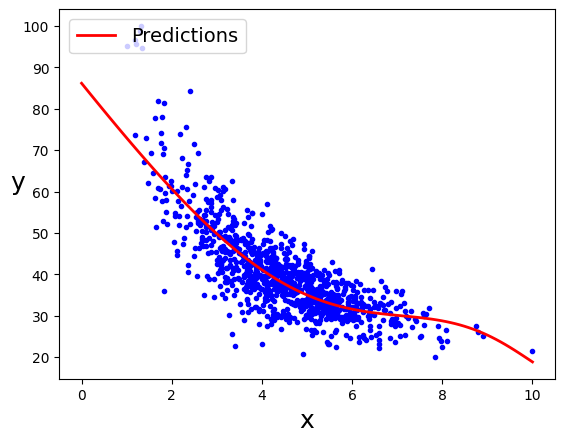

In [15]:
X_fit=np.linspace(0, 10, 100).reshape(100, 1)
y_fit = pipeRidge.predict(X_fit)
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [16]:
#errores:
yhat = pipeRidge.predict(X_test)
# MAE
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
# Rsquare
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
4.120156088702859
-----------------R_Square--------------
0.6639872732779202


In [17]:
#Lasso
pipeLasso = Pipeline([('poly',PolynomialFeatures(degree=10, include_bias=False)),('scalar', StandardScaler(),),('regresor',Lasso(alpha=0.1))])

pipeLasso.fit(X_train, y_train)
pipeLasso['regresor'].coef_, pipeRidge['regresor'].intercept_

(array([-15.31505304,   0.        ,   8.39521278,   0.        ,
          0.        ,  -0.        ,  -0.        ,  -0.        ,
         -1.19592108,  -0.        ]),
 array([40.08050865]))

/home/jmtanous/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


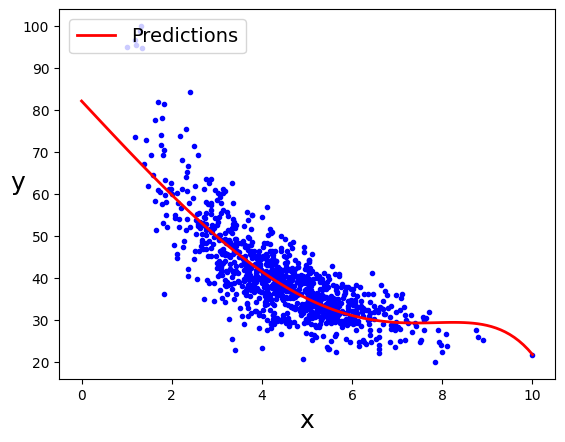

In [18]:
X_fit=np.linspace(0, 10, 100).reshape(100, 1)
y_fit = pipeLasso.predict(X_fit)
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [19]:
#errores:
yhat = pipeLasso.predict(X_test)
# MAE
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
# Rsquare
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
4.144909623917414
-----------------R_Square--------------
0.6640343338331574


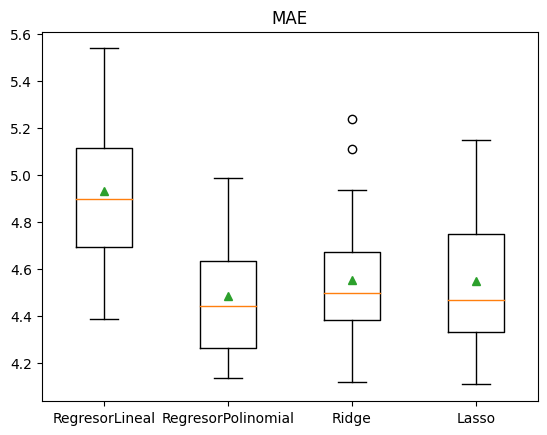

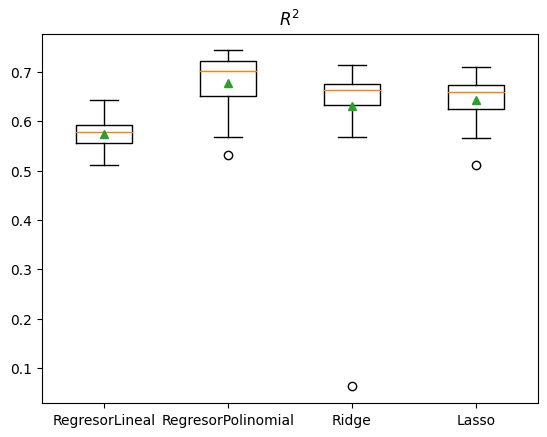

In [20]:
# Para graficar voy a hacer una validación cruzada y registrar el error en varias corridas
from sklearn.model_selection import  cross_validate,  RepeatedKFold
from sklearn.metrics import make_scorer


misModelos = {'RegresorLineal': pipeLinear, 'RegresorPolinomial': pipePoly, 'Ridge': pipeRidge, 'Lasso': pipeLasso}

kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=7)

misMAEs = {}
misRSquares = {}

for nombre, modelo in misModelos.items():
    misMAEs[nombre] = cross_validate(modelo,X,y,cv=kf,scoring=make_scorer(mean_absolute_error))['test_score']
    misRSquares[nombre] = cross_validate(modelo,X,y,cv=kf,scoring=make_scorer(r2_score))['test_score']


plt.boxplot(misMAEs.values(), labels=misMAEs.keys(), showmeans=True)
plt.title('MAE')
plt.show()

plt.boxplot(misRSquares.values(), labels=misRSquares.keys(), showmeans=True)
plt.title('$R^2$')
plt.show()

## Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


#### ¿Qué método conviene más a la empresa?, ¿por que?
Queda claro que el modelo con peor desempeño es el lineal, simplemente al ver los datos podemos deducir que no siguen una recta. Con los datos tenemos yo tomaría el modelo polinomial de cuarto orden, es el que tiene mejor desempeño y es menos complejo que los modelos de más alto grado de Ridge y Lasso además vemos en las gráficas de errores que éste se comporta de manera más consistente con diferentes grupos de datos (no tiene outliers como Ridge y Lasso).



#### ¿Qué porcentajes de entrenamiento y evaluación?
Para determinar la combinación entre entrenamiento y validación podemos usar las curvas de apredizaje e ir midiendo el desempeño conforme cambia los porcentajes de la mezcla.


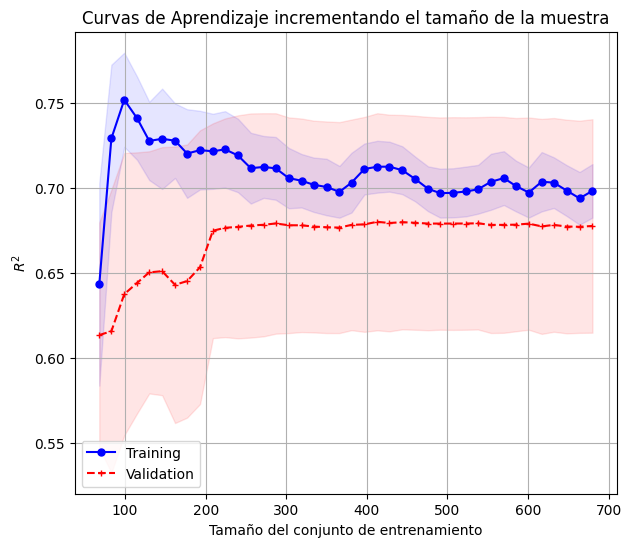

In [21]:
from sklearn.model_selection import learning_curve, validation_curve

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

#    val_mean[val_mean<0] = 0

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('$R^2$')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

delta_train_sz = np.linspace(0.1,1.0,num=40)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipePoly,    
                                                        X = X_train,
                                                        y = y_train,
                                                        cv = kf,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11,
                                                        scoring=make_scorer(r2_score),
                                                        n_jobs=-1
                                                        )

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)


Podemos ver que a partir de 400 muestras el desempeño ya no aumenta. Así que podriamos entrenar el modelo dividiendo el set en 50% para entrenamiento y 50% para validación.

#### ¿Qué error tienes?, ¿es bueno?, ¿Cómo lo sabes?
El error del modelo es: MAE: 4.15

Y el score $R^2$ es: 0.65

Un modelo se puede considerar bueno a partir de un $R^2 Score$ de 0.6, así que el modelo lo considero como bueno.


# Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18397,1723049419,20141204T000000,306000.0,3,1.50,1250,8700,1.0,0,0,...,7,1250,0,1959,0,98168,47.4744,-122.328,1300,8700
11773,2629600016,20150410T000000,625500.0,2,1.00,2160,7439,1.0,0,0,...,6,1300,860,1953,0,98115,47.6981,-122.286,1680,7439
12876,3782100035,20140813T000000,299000.0,3,1.00,960,8100,1.0,0,0,...,7,960,0,1955,0,98155,47.7763,-122.305,1080,8100
12256,7511000140,20140808T000000,994000.0,4,2.50,3470,20445,2.0,0,0,...,10,3470,0,1963,0,98040,47.5470,-122.219,3360,21950
21217,2325400170,20150211T000000,391000.0,4,2.25,2190,3850,2.0,0,0,...,7,2190,0,2006,0,98059,47.4861,-122.161,2190,3980
8614,8024200820,20150213T000000,575700.0,3,1.75,1730,6130,1.0,0,0,...,7,1480,250,1941,0,98115,47.6978,-122.316,1730,6131
15521,3052700225,20140814T000000,727160.0,7,3.75,2310,5000,2.0,0,0,...,8,2310,0,1984,0,98117,47.6781,-122.376,1360,1552
16660,3835500005,20140528T000000,1100000.0,2,1.75,2050,11900,1.0,0,0,...,8,2050,0,1950,0,98004,47.6209,-122.219,2980,11900
8794,1189000025,20140905T000000,659000.0,3,1.50,1540,5040,2.0,0,0,...,8,1540,0,1907,0,98122,47.6138,-122.299,1590,3600
17306,6610000591,20141021T000000,1205000.0,4,2.75,2470,5500,1.0,0,3,...,9,1570,900,1960,2005,98107,47.6586,-122.358,1620,5500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [25]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


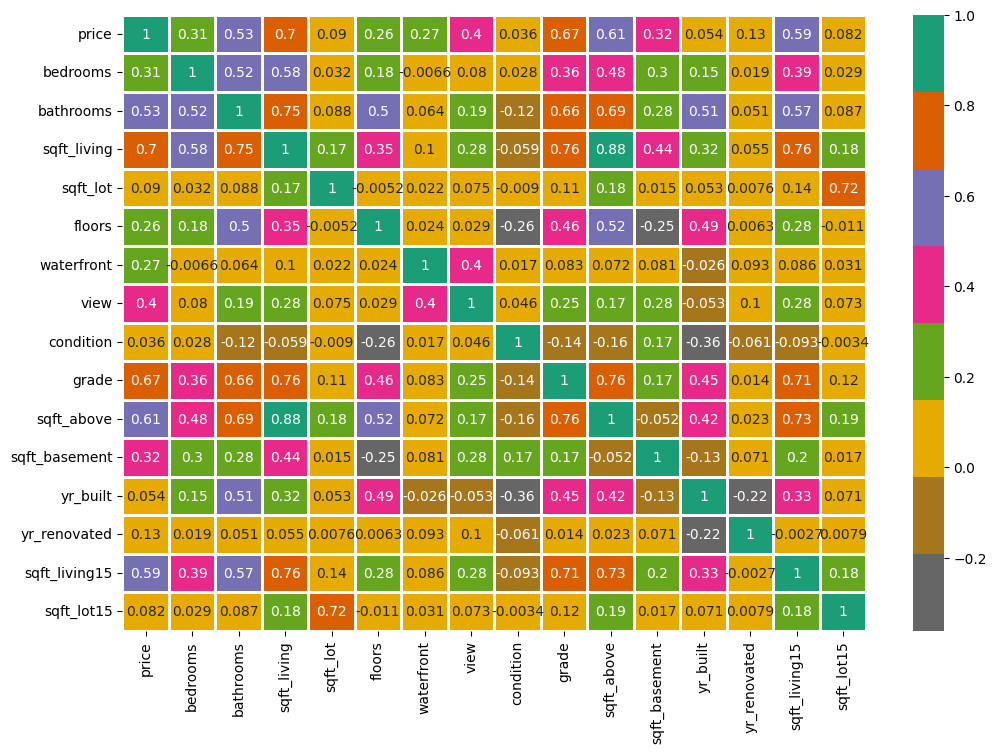

In [26]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [27]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


### Regresión Múltiple Lineal
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada

In [29]:
pipeLinear.fit(X_train,y_train)
pipeLinear['regresor'].coef_, pipeLinear['regresor'].intercept_


(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750272e+01,  6.02175566e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.26274203]))

In [30]:
# No se como visualizar un espacio de 15 dimensiones. :(

In [31]:
#Errores
# MAE
yhat = pipeLinear.predict(X_test)
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
137480.138827315
-----------------R_Square--------------
0.6579723205007599


### Regresión Múltiple Polinomial
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [32]:
# Al igual que el ejercicio 1 voy a usar un polinomio de grado 4
pipePoly = Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),('scalar', StandardScaler(),),('regresor',LinearRegression(fit_intercept=True))])
pipePoly.fit(X_train,y_train)
print('Los coeficientes son:')
for c in pipePoly['regresor'].coef_[0]:
    print(c)
print('el bias es: ',pipeLinear['regresor'].intercept_)


Los coeficientes son:
871970.1796300759
-840230.9866009267
-4769922784025.745
-1152970.4546159112
-1116923.4488822417
-56868074834831.84
-221588.98426337793
363665.06595483184
1292861.2951540865
4297031022247.2993
2306903309476.9785
-2521787.8271952667
-1190839.8512760303
2741148.432918577
-929778.3467266944
9825.609191497439
31743.93312809363
-134638188791199.08
-2722.3371923750383
21290.353078392232
-3446.0144129939144
-895.0326251239167
-21123.846904497273
-50452.622451848496
114797576987055.94
51826039505999.89
-864605.7708793553
-13369.194296676069
62982.756522787065
20652.38955145989
-35517.94221212647
580125438422620.5
-15275.380841226499
-53767.138671875
10668.8984375
8251.8017578125
-2985.908203125
182795.244140625
-495997196053689.6
-188279446833278.75
777886.734375
-17103.21484375
-50862.07421875
-4419.955078125
-109108622314875.9
81980544056927.81
-745159386812952.6
1653254487971068.0
-2872171276116097.0
-877172058702135.4
526840106338260.56
29864338710402.703
-529578399813

In [33]:
# No se como visualizar un espacio de 15 dimensiones. :(

In [34]:
#Errores
# MAE
yhat = pipePoly.predict(X_test)
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
121314.96524069033
-----------------R_Square--------------
0.7797935772423712


### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#### Ridge

In [36]:
pipeRidge = Pipeline([('poly',PolynomialFeatures(degree=4, include_bias=False)), ('scalar', StandardScaler(),) ,('regresor',Ridge(alpha=5,tol=0.1))])

pipeRidge.fit(X_train, y_train)
for c in pipeRidge['regresor'].coef_[0]:
    print(c)
print('el bias es: ',pipeRidge['regresor'].intercept_)

63934.89473332128
-12375.911850979715
22579.29273423322
-38419.81970302156
-69387.245890613
-3529.130285182221
37029.00192208484
28350.417698510275
138657.54896458855
30790.47379664535
-10666.312260718405
-165573.75838534444
-46341.136154529515
172144.30654352444
-78005.51427563786
50047.749806426145
-16148.957214190343
-10720.702153393808
-34974.52343350773
17473.26909817458
-22675.617781340385
17988.45936398518
69083.4180796869
54502.6190611227
-17106.02646950073
10039.634117771044
-2566.471603421409
-33608.465299175565
90123.35508479092
-44798.053975522365
-74376.56104521682
-44390.840852226895
5764.525738150809
-54267.148172484005
-28491.616697909925
-421.0807873297071
28104.445476560526
-41187.35580559601
-51842.47830083421
-204.65467732416474
574.7395633091616
-47529.97740173612
22897.73608574839
-18528.96561812019
-35102.35400399603
-6474.631633565261
-50322.78162668515
-9542.721867784698
-6856.265905260296
9422.83330878538
10989.16595185428
-34084.73157036402
-21758.20333795453

In [37]:
#Errores
# MAE
yhat = pipeRidge.predict(X_test)
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
127765.95726154641
-----------------R_Square--------------
0.48259345764273476


#### Lasso


In [38]:
pipeLasso = Pipeline([('poly',PolynomialFeatures(degree=4, include_bias=False)),('scalar', StandardScaler(),),('regresor',Lasso(alpha=.01, tol=0.1, max_iter=10000))])
pipeLasso.fit(X_train, y_train)
pipeLasso['regresor'].coef_,pipeLasso['regresor'].intercept_


(array([259604.34891066,   3026.11933129, 181124.85014297, ...,
           565.22216791,  25266.62517535,  36314.30265792]),
 array([539150.7367232]))

In [39]:
#Errores
# MAE
yhat = pipeLasso.predict(X_test)
print('-----------------MAE--------------')
print(mean_absolute_error(y_test,yhat))
print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------MAE--------------
127977.25071314537
-----------------R_Square--------------
0.507263727221331


### Finalmente grafica :
- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

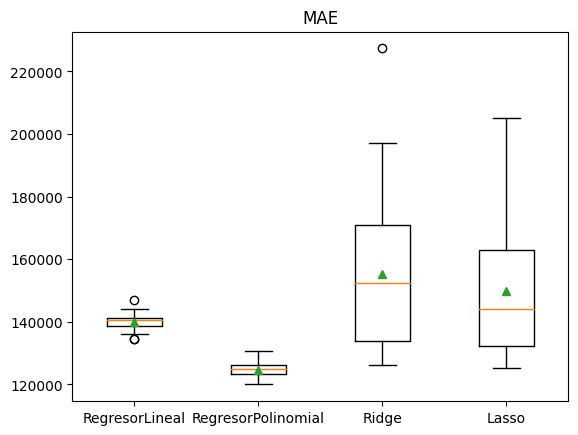

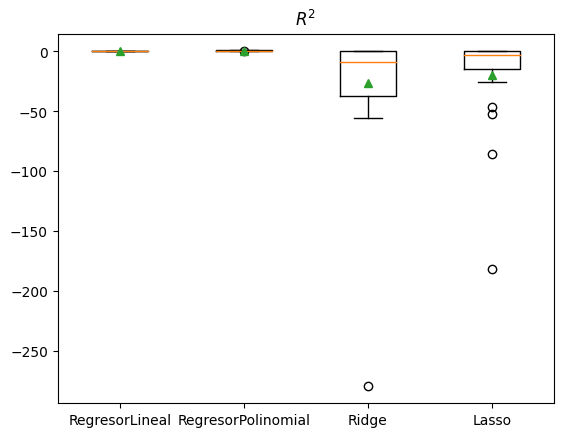

In [40]:
misModelos = {'RegresorLineal': pipeLinear, 'RegresorPolinomial': pipePoly, 'Ridge': pipeRidge, 'Lasso': pipeLasso}

kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=7)

misMAEs = {}
misRSquares = {}

for nombre, modelo in misModelos.items():
    misMAEs[nombre] = cross_validate(modelo,X,y,cv=kf,n_jobs=-1,scoring=make_scorer(mean_absolute_error))['test_score']
    misRSquares[nombre] = cross_validate(modelo,X,y,cv=kf,n_jobs=-1,scoring=make_scorer(r2_score))['test_score']


plt.boxplot(misMAEs.values(), labels=misMAEs.keys(), showmeans=True)
plt.title('MAE')
plt.show()

plt.boxplot(misRSquares.values(), labels=misRSquares.keys(), showmeans=True)
plt.title('$R^2$')
plt.show()

# Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
En este caso los modelos Ridge y Lasso se desempeñaron muy mal, esto se debe a al costo computacional, es computacionalmente prohibitivo entrenar Ridge o Lasso con polinomios de mayor grado a 4, Lasso y Ridge funcionan mejor con polinomios de alto grado. Por otro lado la regresión polinomial de 4 grado se desempeño bien y sigue siendo un modelo más simple, así que también decidiría por el polinomial de cuarto orden.

El MEE de este modelo es: 121314.96
y el score $R^2$ es 0.78

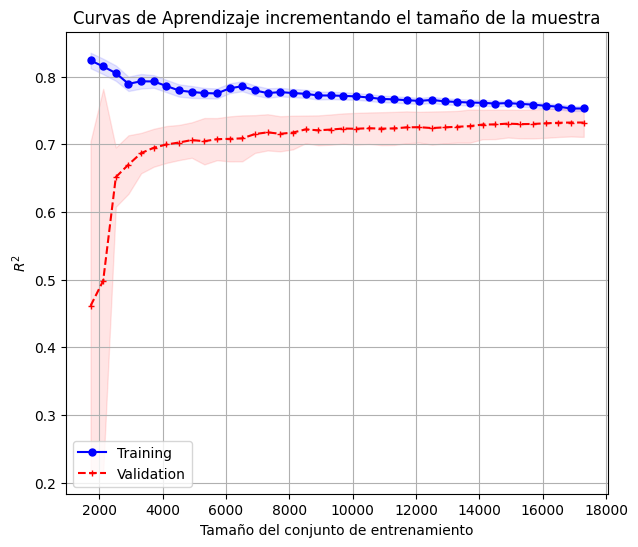

In [41]:
# Para ver como se comparta el modelo respecto al entrenamiento, usaremos las curvas de aprendizaje nuevamente:

delta_train_sz = np.linspace(0.1,1.0,num=40)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipePoly,    
                                                        X = X,
                                                        y = y,
                                                        cv = kf,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11,
                                                        scoring=make_scorer(r2_score),
                                                        n_jobs=-1
                                                        )

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)


Para este caso podemos ver que el modelo sigue aprendiendo conforme aumenta el tamaño de los datos de entrenamiento, aquí la recomendación es dejar un proporción pequeña de datos de prueba, yo recomenaría 90% entrenamiento, 10% prueba

## Conclusiones
